# Определение жанра по изображению обложки музыкального диска


## Отчет по проекту

### Содержание
Целью данного проекта является разработка модели, способной классифицировать музыкальные жанры по изображениям обложек альбомов. Для этого мы использовали методы глубокого обучения и техники обработки изображений. В отчёте будут подробно описаны следующие аспекты проекта:
* Разведочный анализ данных: Оценка качества данных, выявление дисбаланса классов и дубликатов.
* Целевая метрика: Определение наиболее подходящей метрики для оценки производительности модели.
* Подготовка данных: Предобработка изображений, извлечение эмбеддингов и разделение данных на обучающую, валидационную и тестовую выборки.
* Baseline модель: Использование метода k ближайших соседей (k-NN) для установления базового уровня производительности.
* Нейронная сеть: Обучение модели EfficientNet B1 для классификации жанров.
* Анализ и сравнение результатов: Оценка эффективности модели на основе выбранных метрик и визуализация эмбеддингов.
* Выводы и рекомендации: Обсуждение результатов, выявление проблем и предложение путей улучшения модели.
  
###  Разведочный анализ данных
* Датасет: 7800 изображений обложек альбомов в формате PNG, распределенных по 10 музыкальным жанрам.
* Дисбаланс классов: Наблюдается значительный дисбаланс, с преобладанием жанров "country" и "anime" и наименьшим количеством образцов для жанра "rap".
* Дубликаты: Обнаружены дубликаты изображений как с одинаковыми, так и с разными именами, но идентичными размерами файлов.

### Целевая метрика
Для оценки эффективности модели использовались следующие метрики:
* Основная метрика: Микро-усредненный F1-скор (Micro F1-score): Устойчив к дисбалансу классов и обеспечивает точную оценку, учитывая каждый экземпляр в датасете равноценно.
* Вспомогательная метрика: Макро-усредненный F1-скор (Macro F1-score): Позволяет выявить слабости в классификации отдельных классов и детализировать производительность по каждому жанру.
### Подготовка данных
* Извлечение эмбеддингов: Использовалась предобученная модель EfficientNet B2 для получения 1408-мерных эмбеддингов для каждого изображения.
* Удаление дубликатов: Дубликаты были удалены из датафрейма, чтобы избежать искажения результатов.
* Разделение данных: Датасет был разделен на обучающую (60%), валидационную (20%) и тестовую (20%) выборки, с учётом стратификации по классам.
### Baseline model
* Модель k-NN: Использовалась библиотека Faiss для поиска ближайших соседей и классификации жанров на основе эмбеддингов.
* Гиперпараметры: Оптимальное количество соседей (k) было подобрано с помощью анализа кривых F1-score.
* Результаты: Модель k-NN достигла точности около 51% (Micro F1-score) на тестовой выборке.
### Нейронная сеть
* Модель EfficientNet B1: Была выбрана архитектура EfficientNet B1 с предобученными весами IMAGENET1K_V2.
* Обучение: Модель была обучена на обучающей выборке с использованием оптимизатора AdamW и функции потерь кросс-энтропии.
* Результаты: Нейронная сеть достигла точности около 71% (Micro F1-score) на тестовой выборке, что значительно превосходит baseline модель.
### Анализ и сравнение результатов
* Сравнение метрик: Нейронная сеть значительно превзошла baseline модель по всем метрикам, демонстрируя более высокую точность и полноту для всех классов.
* Визуализация эмбеддингов: t-SNE и UMAP были использованы для визуализации эмбеддингов, полученных из предобученной модели и обученной нейронной сети. Визуализация показала, что эмбеддинги из нейронной сети обеспечивают лучшую кластеризацию по жанрам, что подтверждает её эффективность.
* Анализ ошибок: Были изучены ошибки модели и выявлены классы, которые вызывают наибольшие трудности при классификации (например, "disco", "rap", "edm").

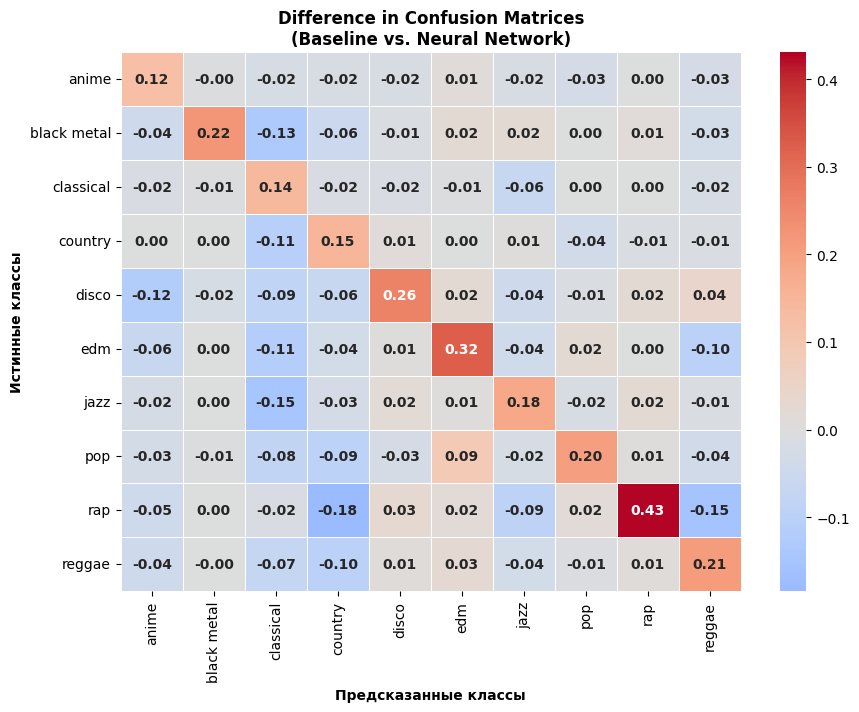
### Выводы и рекомендации
Нейронная сеть EfficientNet B1 продемонстрировала высокую эффективность в классификации музыкальных жанров по обложкам альбомов, значительно превосходя baseline модель.
### Для дальнейшего улучшения модели рекомендуется:
* Увеличить набор данных, особенно для классов с наибольшим количеством ошибок.
* Использовать мультимодальные подходы, комбинируя визуальные данные с текстовой информацией.
* Применить методы обработки естественного языка (NLP) для извлечения информации из текста на обложках.
* Взять модель большего размера
* Провести более детальный анализ ошибок модели для выявления специфических проблем и разработки соответствующих решений.
### Заключение
Данный проект продемонстрировал потенциал глубокого обучения для классификации музыкальных жанров по изображениям обложек альбомов. Полученные результаты свидетельствуют о том, что нейронные сети могут быть эффективным инструментом для автоматизации задач, связанных с анализом музыкального контента.

## Импорт

In [1]:
!pip install faiss-cpu --quiet
!pip install umap-learn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 464.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.6 MB/s eta 0:00:00


In [3]:
import os
import gdown
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import seaborn as sns
import random
import PIL
import faiss
import umap
import time

from IPython.display import Image, display
from IPython.core.display import HTML
from matplotlib import pyplot as plt
from torchvision.transforms import v2
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Subset, Dataset
from torch.optim import lr_scheduler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from tqdm.autonotebook import tqdm, trange

if torch.cuda.is_available():
    print("GPU is available.")
    device = torch.device("cuda")
else:
    print("GPU is not available.")
    device = torch.device("cpu")

GPU is available.


In [4]:
SEED = 42
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
np.random.seed(SEED)
random.seed(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## Загрузка данных

In [5]:
# Путь к файлу, который вы хотите проверить и загрузить
file_path = 'pet2.zip'

# Проверка наличия файла
if not os.path.exists(file_path):
    # URL для скачивания файла
    url = "https://drive.google.com/file/d/1GtKg5_ma4LJKq_b4_XHS0eAZ04SlIzVj/view?usp=drive_link"

    # Загрузка файла
    gdown.download(url=url, output=file_path, quiet=False, fuzzy=True)

    # Распакуем архив с архивами
    !unzip -q /content/pet2.zip -d /content/unpacked/

    # Распакуем архивы с жанрами в отдельную папку
    !for z in /content/unpacked/*.zip; do unzip -q "$z" -d "/content/genres/"; done
else:
    print(f"Файл {file_path} уже существует.")

Downloading...
From (original): https://drive.google.com/uc?id=1GtKg5_ma4LJKq_b4_XHS0eAZ04SlIzVj
From (redirected): https://drive.google.com/uc?id=1GtKg5_ma4LJKq_b4_XHS0eAZ04SlIzVj&confirm=t&uuid=ad340d6e-2858-473b-ac6e-c818d4460c35
To: /content/pet2.zip
100%|██████████| 1.26G/1.26G [00:41<00:00, 30.7MB/s]


## Разведочный анализ данных

In [6]:
# Путь к папке с жанрами
base_path = '/content/genres/'

# Список для хранения информации о файлах
data = []

# Обход всех подпапок в директории genres
for genre in os.listdir(base_path):
    genre_path = os.path.join(base_path, genre)
    if os.path.isdir(genre_path):  # Проверка, что это директория
        for file in os.listdir(genre_path):
            file_path = os.path.join(genre_path, file)
            if os.path.isfile(file_path):  # Проверка, что это файл
                try:
                    # Открытие изображения для получения его размеров
                    with PIL.Image.open(file_path) as img:
                        width, height = img.size
                        shape = f"{width}x{height}"
                        aspect_ratio = width / height
                    # Получение размера файла
                    size = os.path.getsize(file_path)
                    # Извлечение расширения файла
                    extension = os.path.splitext(file)[1]
                    file_name = os.path.splitext(file)[0]
                    # Добавление информации в список
                    data.append({
                        "genre": genre,
                        "size": size,
                        "shape": shape,
                        "ratio": aspect_ratio,
                        "file_extension": extension,
                        "name": file_name,
                        "path": file_path
                    })
                except Exception as e:
                    print(f"Не удалось обработать файл {file_path}: {e}")

# Создание датафрейма из собранной информации
df = pd.DataFrame(data)
df.sample(5)

genre    size    shape  ratio file_extension  \
2114   jazz  173928  300x300    1.0           .png   
2080   jazz  179621  300x300    1.0           .png   
1078  anime  177970  300x300    1.0           .png   
5395    pop  132102  300x300    1.0           .png   
101   anime  188229  300x300    1.0           .png   

                                      name  \
2114  e3460c1a-910f-4004-8895-f40232ab6ea8   
2080  47dd4240-0dac-497c-94a2-ba56f292d5e5   
1078  aec264b8-01d2-4f2d-8aca-0daf3d93935c   
5395  8f1be791-0334-4c9b-8de4-5a0d69feae8c   
101   310fc909-29ce-41d0-a357-ba2024e0e758   

                                                   path  
2114  /content/genres/jazz/e3460c1a-910f-4004-8895-f...  
2080  /content/genres/jazz/47dd4240-0dac-497c-94a2-b...  
1078  /content/genres/anime/aec264b8-01d2-4f2d-8aca-...  
5395  /content/genres/pop/8f1be791-0334-4c9b-8de4-5a...  
101   /content/genres/anime/310fc909-29ce-41d0-a357-...

In [7]:
%%time
fig, axs = plt.subplots(nrows=len(df['genre'].unique()), ncols=8, figsize=(16, 20))

# Убираем оси, так как они не нужны для изображений
for ax in axs.flat:
    ax.axis('off')

# Группируем данные по жанрам и выбираем первые 8 изображений из каждого
for idx, (genre, group) in enumerate(df.groupby('genre')):
    selected_images = group.head(8)  # Выбираем первые 8 записей для каждого жанра
    for col, (_, image_data) in enumerate(selected_images.iterrows()):
        # Загружаем изображение
        img = PIL.Image.open(image_data['path'])
        axs[idx, col].imshow(img)
        axs[idx, col].set_title(genre, fontsize=12)

# Отображаем изображения
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Визуальная оценка обложек альбомов подтвердила наличие жанровой специфики в оформлении. Жанры с отличительным стилем (металл, классика, аниме) легче различимы, в то время как жанры с высокой вариативностью (поп, рэп, EDM) имеют больше пересечений.

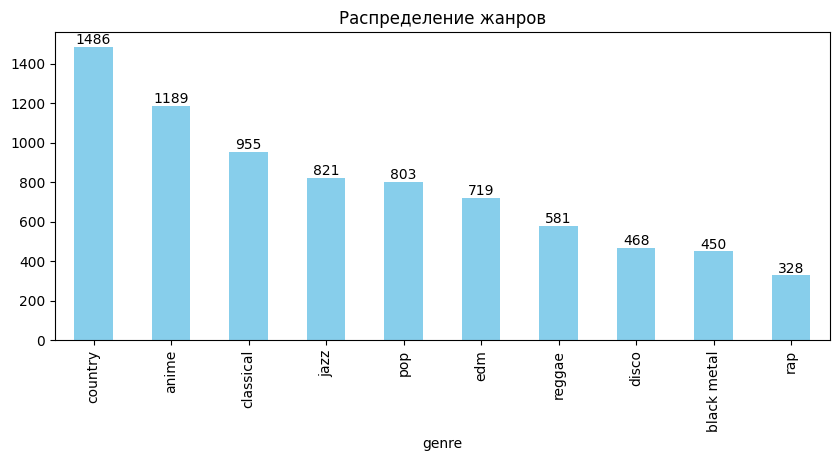

In [8]:
# Создание столбцовой диаграммы
ax = df['genre'].value_counts().plot.bar(color='skyblue', figsize=(10, 4))
plt.title('Распределение жанров')

# Автоматическая аннотация количества над каждым столбцом
ax.bar_label(ax.containers[0])

# Показать график
plt.show()

Дисбаланс классов, наиболее представленный класс – country и anime, меньше всего – rap

In [9]:
# Проверим дубликаты
print("Дубликатов по имени:", df.name.duplicated().sum())

# Проверим еще другие параметры, чтобы убедиться, что это не случайность
duplicated_names = df[df.name.duplicated(keep=False)].sort_values(by='name')
duplicated_names

Дубликатов по имени: 4


genre    size    shape  ratio file_extension  \
5765   disco  150029  300x300    1.0           .png   
7256  reggae  150029  300x300    1.0           .png   
5366     pop  148802  300x300    1.0           .png   
5888   disco  148802  300x300    1.0           .png   
4704     pop  153558  300x300    1.0           .png   
7495     rap  153558  300x300    1.0           .png   
5381     pop  175917  300x300    1.0           .png   
7771     rap  175917  300x300    1.0           .png   

                                      name  \
5765  5c4f2c7c-8412-39fa-9468-23c52e285cd7   
7256  5c4f2c7c-8412-39fa-9468-23c52e285cd7   
5366  6ea3d2de-f234-4bdd-8ba8-4e9523f5ae1a   
5888  6ea3d2de-f234-4bdd-8ba8-4e9523f5ae1a   
4704  7e5955d3-c4f3-493c-a3d4-8b855bfc1833   
7495  7e5955d3-c4f3-493c-a3d4-8b855bfc1833   
5381  9123d325-bf8e-4423-be98-98478dccee20   
7771  9123d325-bf8e-4423-be98-98478dccee20   

                                                   path  
5765  /content/genres/disco/5c4f2c7c-8412-39fa-9468-...  
7256  /content/genres/reggae/5c4f2c7c-8412-39fa-9468...  
5366  /content/genres/pop/6ea3d2de-f234-4bdd-8ba8-4e...  
5888  /content/genres/disco/6ea3d2de-f234-4bdd-8ba8-...  
4704  /content/genres/pop/7e5955d3-c4f3-493c-a3d4-8b...  
7495  /content/genres/rap/7e5955d3-c4f3-493c-a3d4-8b...  
5381  /content/genres/pop/9123d325-bf8e-4423-be98-98...  
7771  /content/genres/rap/9123d325-bf8e-4423-be98-98...

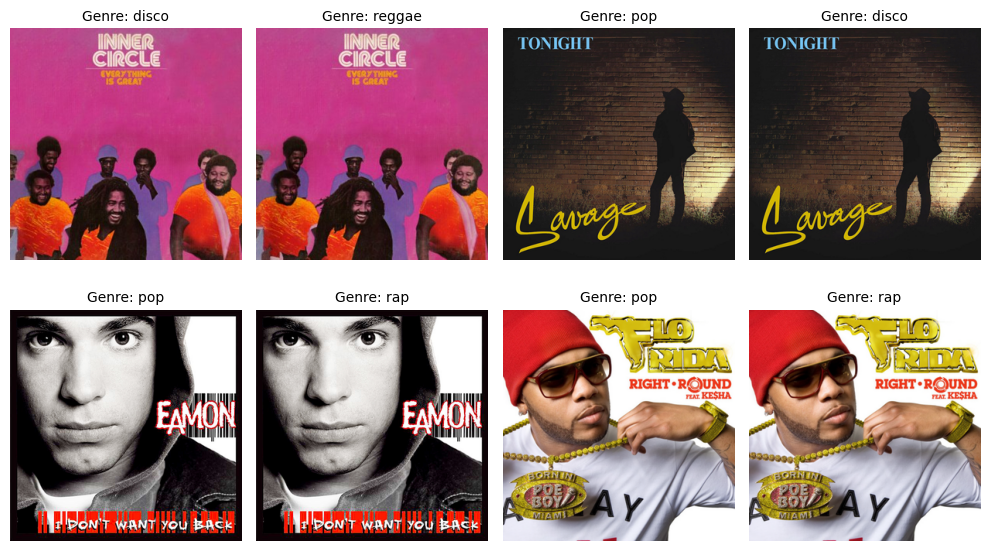

In [10]:
'''
Отображение изображений для файлов с дублирующимися именами.
Каждое изображение подписано соответствующим жанром.
'''
# Подготовка фигуры для вывода изображений
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))

# Отключение осей для всех изображений в сетке
for ax in axs.flat:
    ax.axis('off')

# Итерация по путям первых 8 файлов и отображение каждого изображения
for i, path in enumerate(duplicated_names.path[:8]):
    img = PIL.Image.open(path)
    axs[i//4, i%4].imshow(img)  # Позиционирование изображения
    axs[i//4, i%4].set_title(f"Genre: {duplicated_names.iloc[i]['genre']}", fontsize=10)  # Установка жанра как заголовка

plt.tight_layout()
plt.show()

Найдено 4 достоверных дубликата – одинаковые имя и вес. Есть предположение, что это могут быть мультижанровые альбомы, так Florida - Right Round является поп-музыкой в жанре реп.

Возможных дубликатов по весу: 260


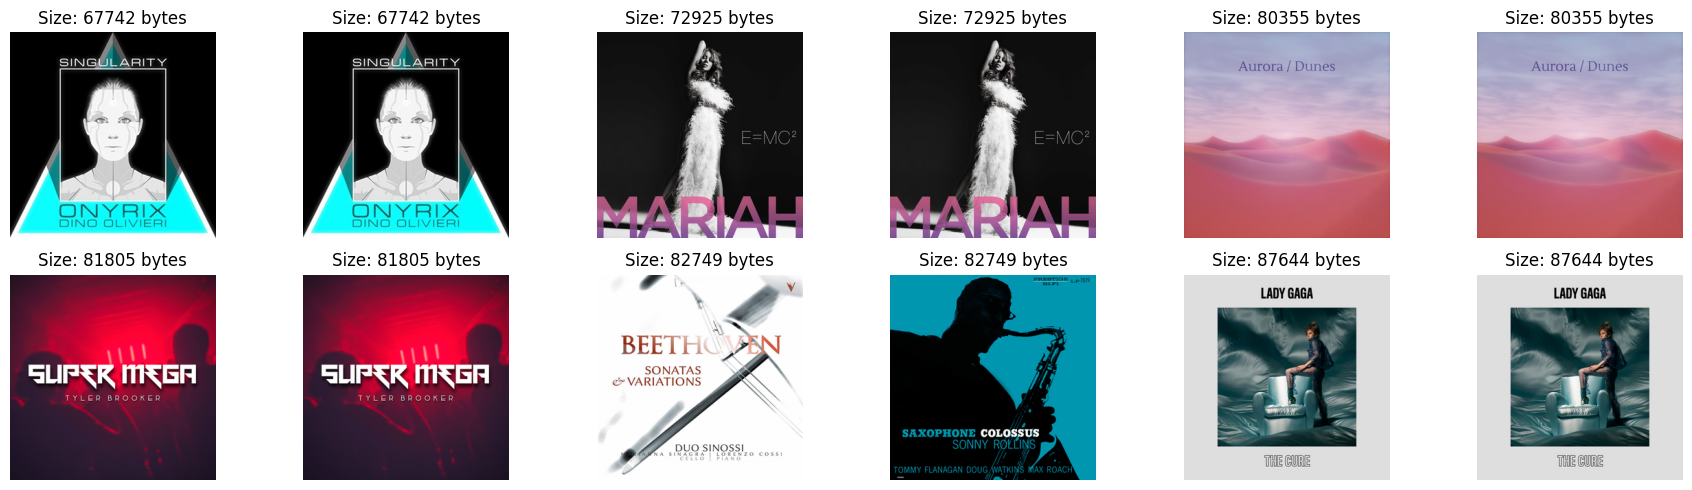

In [11]:
# посмотрим обложки с одинаковым весом
print("Возможных дубликатов по весу:", df['size'].astype('object').duplicated().sum())
duplicates = df[df['size'].astype('object').duplicated(keep=False)].sort_values(by='size')

# Подготовка фигуры для вывода изображений
fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(18, 5))

# Плоскости для каждого изображения устанавливаются в 'off'
for ax in axs.flat:
    ax.axis('off')

# Итерация по путям первых 12 файлов и отображение каждого изображения
for i, path in enumerate(duplicates.path.iloc[:12]):
    img = PIL.Image.open(path)
    axs[i//6, i%6].imshow(img)  # Определение позиции каждого изображения
    axs[i//6, i%6].set_title(f"Size: {duplicates.iloc[i]['size']} bytes")  # Подпись с размером файла

plt.tight_layout()
plt.show()

Некоторые являются дубликатами, но есть и просто разные обожки с одним весом. Устраним эти дубликаты на этапе после расчета эмбеддингов.

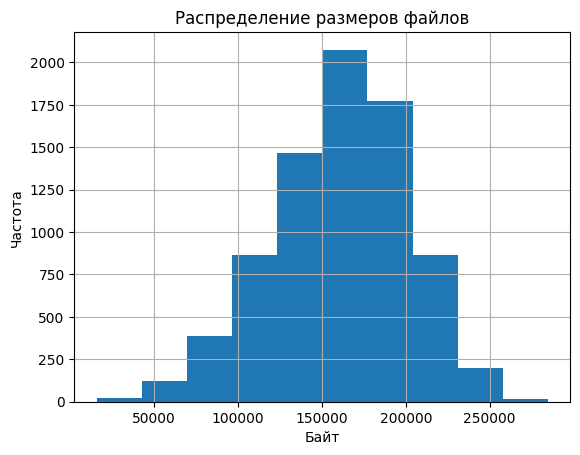

In [12]:
# проверим обложки по весу, нет ли ошибок
df['size'].hist()
plt.title('Распределение размеров файлов')
plt.xlabel('Байт')
plt.ylabel('Частота');

Нормальное распределение, аномалий нет.

In [13]:
print(df['shape'].value_counts(), '\n')
print(df['file_extension'].value_counts())

shape
300x300    7800
Name: count, dtype: int64 

file_extension
.png    7800
Name: count, dtype: int64


**Вывод**
* В датасете представлено 7800 обложек музыкальных альбомов в формате PNG.
* Наблюдается значительный дисбаланс классов, количество обложек постепенно уменьшается от жанра country (1486 обложек) до жанра rap (328 обложек).
* Присутствуют дубликаты, как среди обложек с одинаковыми названиями, так и с разными названиями, но одинаковым весом файла. Планируется удаление дубликатов после расчета эмбедингов.
* Специфических аномалий или необычных артефактов в данных не обнаружено.
* Данные были структурированы в датафрейм и визуализированы для анализа.
* Визуальные особенности обложек альбомов могут служить хорошими признаками для классификации, особенно для жанров с отличительным стилем.

## Целевая метрика

Для оценки производительности нашей модели мы используем следующие метрики:

1. **Основная метрика: Микро-усредненный F1-скор (Micro F1-score)**:
   - **Преимущества**: Устойчив к дисбалансу классов и обеспечивает точную оценку, учитывая каждый экземпляр в датасете равноценно. Особенно полезен в условиях, где требуется точное и полное предсказание.
   - **Значение**: Эта метрика равномерно учитывает точность и полноту, что важно для проектов, связанных с классификацией музыкальных жанров, где каждый экземпляр значим.

2. **Вспомогательная метрика: Макро-усредненный F1-скор (Macro F1-score)**:
   - **Преимущества**: Позволяет выявить слабости в классификации отдельных классов, помогает детализировать производительность по каждому жанру.
   - **Значение**: Используется для улучшения понимания производительности модели по каждому классу и определения направлений для оптимизации.

Использование этих двух метрик позволяет нам не только оценить общую эффективность модели, но и подробно анализировать её способность работать с различными классами данных.

Выбранные метрики позволяют всесторонне оценить эффективность модели, учитывая как общую точность, так и способность классифицировать каждый жанр.  
  
Анализ значений метрик поможет выявить сильные и слабые стороны модели и определить направления для её улучшения.


## Подготовка данных к Baseline модели

Использование предобученной модели EfficientNet B2 позволяет извлечь высокоуровневые признаки из изображений, которые могут быть эффективны для классификации жанров.

In [14]:
# Определите путь к корневой директории с папками жанров
base_path = '/content/genres/'

# Определение трансформации предобработки
transform = transforms.Compose([
    transforms.Resize((260, 260)),  # Размер, ожидаемый EfficientNet B2
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Создание набора данных
dataset = datasets.ImageFolder(root=base_path, transform=transform)

# DataLoader для загрузки данных
batch_size = 128
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

In [15]:
model = models.efficientnet_b2(weights='EfficientNet_B2_Weights.IMAGENET1K_V1')
model = torch.nn.Sequential(*(list(model.children())[:-1]))
model = model.to(device)  # Перенос модели на GPU
model.eval();

Downloading: "https://download.pytorch.org/models/efficientnet_b2_rwightman-c35c1473.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b2_rwightman-c35c1473.pth
100%|██████████| 35.2M/35.2M [00:00<00:00, 63.7MB/s]


In [16]:
def extract_embeddings(data_loader, model):
    """
    Извлекает эмбеддинги для изображений с помощью предобученной модели нейронной сети.

    Данная функция принимает на вход DataLoader, содержащий изображения и их метки, а также модель для генерации эмбеддингов.
    Изображения передаются через модель, и результаты (эмбеддинги) собираются в список. Функция также сохраняет метки и пути к файлам каждого изображения.

    Args:
      data_loader (torch.utils.data.DataLoader)
      model (torch.nn.Module)

    Returns:
      Tuple[torch.Tensor, List[int], List[str]]: Кортеж, содержащий три элемента:
        - embeddings (torch.Tensor): Тензор, содержащий эмбеддинги всех изображений.
        - labels (List[int]): Список меток классов для каждого изображения.
        - file_paths (List[str]): Список строк, содержащих пути к файлам каждого изображения.
    """
    embeddings = []
    labels = []
    file_paths = []  # Список для хранения путей к файлам

    with torch.no_grad():
        for num, (images, targets) in enumerate(tqdm(data_loader)):
            images, targets  = images.to(device), targets.to(device)  # Перенос изображений на GPU
            outputs = model(images).to('cpu')
            embeddings.append(outputs.squeeze(-1).squeeze(-1))
            labels.extend(targets.to('cpu').numpy())
            # Добавляем пути к файлам из текущего батча
            batch_paths = [data_loader.dataset.samples[batch_size*num+i][0] for i in range(targets.size(0))]
            file_paths.extend(batch_paths)

    embeddings = torch.cat(embeddings, dim=0)
    return embeddings, labels, file_paths

In [17]:
# Подгрузим эмбединги после сохранения
file_path = '/content/embeddings_with_paths.pkl'

# Проверка наличия файла
if not os.path.exists(file_path):
    # URL для скачивания файла
    url = "https://drive.google.com/file/d/1LgnTKR4OjSYgREJbF9V5zckJTFiMh3rj/view?usp=drive_link"

    # Загрузка файла
    gdown.download(url=url, output=file_path, quiet=False, fuzzy=True)

    df_embeddings = pd.read_pickle('/content/embeddings_with_paths.pkl')

else:
    print(f"Файл {file_path} уже существует.")
    try:
        df_embeddings = pd.read_pickle(file_path)
    except FileNotFoundError:

        embeddings, labels, file_path = extract_embeddings(data_loader, model)

        # Преобразование эмбеддингов в DataFrame
        df_embeddings = pd.DataFrame(embeddings.numpy())
        df_embeddings['label'] = labels
        df_embeddings['genre'] = [dataset.classes[label] for label in labels]
        df_embeddings['file'] = file_path
        df_embeddings.to_pickle('embeddings_with_paths.pkl')
        df_embeddings.head(3)

Downloading...
From: https://drive.google.com/uc?id=1LgnTKR4OjSYgREJbF9V5zckJTFiMh3rj
To: /content/embeddings_with_paths.pkl
100%|██████████| 44.5M/44.5M [00:02<00:00, 17.9MB/s]


In [18]:
print("Дубликатов по эмбедингам:", df_embeddings.iloc[:,:1408].duplicated().sum())
emb_dublicates = df_embeddings[df_embeddings.iloc[:,:1408].duplicated(keep=False)].iloc[:,-4:].sort_values(by=1407)

Дубликатов по эмбедингам: 52


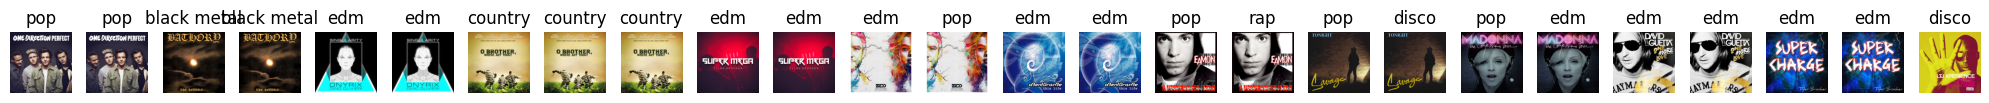

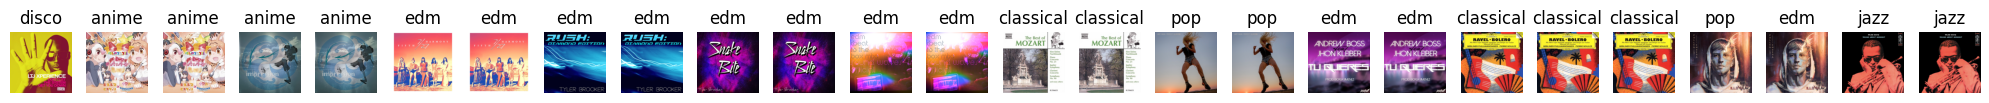

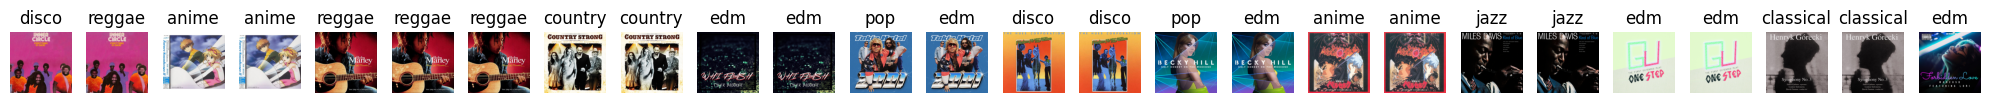

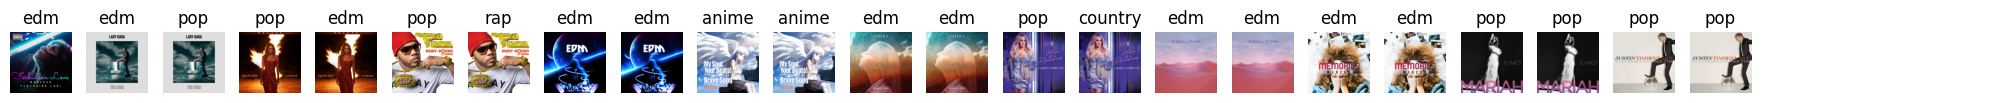

In [19]:
def display_images(paths, genres, rows=1, cols=8):
    """
    Функция для отрисовки дубликатов по эмбедингам
    Args:
      paths:
      genres:
      rows:
      cols:
    """
    fig, ax = plt.subplots(rows, cols, figsize=(20, rows))  # Увеличенный размер фигуры
    if rows * cols == 1:
        ax = [ax]  # Обертываем в список, если ax не массив
    ax = np.array(ax).reshape(rows, cols)  # Преобразуем ax в массив для универсального доступа

    # Заполняем все ячейки ax изображениями или пустым текстом, если изображений не хватает
    for i in range(rows * cols):
        if i < len(paths):
            img = PIL.Image.open(paths[i])
            ax_idx = np.unravel_index(i, (rows, cols))
            ax[ax_idx].imshow(img)
            ax[ax_idx].axis('off')
            if i < len(genres):
                ax[ax_idx].set_title(genres[i])
        else:
            ax_idx = np.unravel_index(i, (rows, cols))
            ax[ax_idx].axis('off')

    plt.tight_layout()
    plt.show()

paths = emb_dublicates['file'].tolist()
genres = emb_dublicates['genre'].tolist()  # Список жанров

# Теперь показываем по 8 изображений для каждого дубликата, с подписями жанров
for i in range(0, len(emb_dublicates), 26):
    display_images(paths[i:i+34], genres[i:i+26], rows=1, cols=26)

Удалим дубликаты, некоторые дубликаты имеют смысл для мультижанровых альбомов, но много дубликатов в одном жанре.  
Удаление дубликатов по эмбедингам гарантирует, что в датасете останутся только уникальные изображения, что важно для предотвращения переобучения модели.

In [20]:
# Удаление дублирующихся файлов, оставляем по одному экземпляру каждого файла
# try:
#     for file_path in df_embeddings[df_embeddings.iloc[:,:1408].duplicated()].file:
#         os.remove(file_path)
#     df_embeddings = df_embeddings[~df_embeddings.iloc[:,:1408].duplicated()].reset_index()
# except FileNotFoundError:
#     print("Файлы уже были удалены.", end=' ')
# print("Дубликатов больше нет.")

In [21]:
# чистый датафрейм без дублей
df_emb = df_embeddings[~df_embeddings.iloc[:,:1408].duplicated()].reset_index(drop=True)

In [22]:
df_emb.head(2)

0         1         2         3         4         5         6  \
0  0.018681 -0.119804  0.102202 -0.087581 -0.016965 -0.110300 -0.134806   
1 -0.101186 -0.137188 -0.160559  0.142093  0.811129  0.268087  0.657196   

          7         8         9  ...      1401      1402      1403      1404  \
0 -0.126276 -0.117780 -0.070974  ...  1.219403  0.165776 -0.123284 -0.131956   
1 -0.140100  0.615071  0.595990  ... -0.141257 -0.161090  0.365105 -0.076695   

       1405      1406      1407  label  genre  \
0  0.045983 -0.094757  0.071314      0  anime   
1  0.079715 -0.115569  0.018749      0  anime   

                                                file  
0  /content/genres/anime/00095702-6b86-4bb1-880e-...  
1  /content/genres/anime/0091bee3-a67a-457e-8c5f-...  

[2 rows x 1411 columns]

In [23]:
# разобьем данные на трейн, тест, валидацию
X_train, X_test, y_train, y_test = train_test_split(
    df_emb.iloc[:,:1408], df_emb['label'], test_size=0.2,stratify=df_emb['label'], random_state=SEED)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25,stratify=y_train, random_state=SEED)

category_names = df_emb['genre'].unique()

Подготовили эмбединги, убрали дубликаты одних и тех же альбомов. Разделили на три выборки для обучения, валидации и тестирования.Стратифицированное разделение данных гарантирует, что распределение классов в обучающей, валидационной и тестовой выборках будет пропорционально исходному распределению в датасете.  

Подготовка данных является важным этапом, который влияет на эффективность модели. Извлечение эмбеддингов, удаление дубликатов и стратифицированное разделение данных способствуют повышению качества обучения и оценки модели.

## Embedding Representation v1

Применим метод t-SNE (t-distributed Stochastic Neighbor Embedding) для визуализации данных эмбеддингов обложек музыкальных альбомов. t-SNE помогает нам уменьшить размерность данных до 2D, что делает возможным их визуализацию. Это позволяет наглядно оценить, как эмбеддинги из разных музыкальных жанров группируются в пространстве, указывая на их взаимное сходство или различие.

In [24]:
emb_v1 = df_emb.iloc[:,:1408] # извлекаем только эмбединги

# Применение t-SNE к данным
tsne_results = TSNE(n_components=2,  perplexity=50, random_state=SEED, n_jobs=-1).fit_transform(emb_v1.values)

In [25]:
reducer = umap.UMAP(n_jobs=-1)

# Применение UMAP
umap_res = reducer.fit_transform(emb_v1.values)

In [26]:
def plot_embeddings(df, embeddings, titles, axs):
    """
    Функция для визуализации эмбеддингов с использованием t-SNE и UMAP.

    Parameters:
        df (DataFrame): DataFrame содержащий жанры.
        embeddings (list): Список массивов с координатами для визуализации.
        titles (list): Названия графиков.
        axs (array): Массив осей для рисования.
    """
    unique_genres = np.unique(df['genre'])  # Уникальные жанры
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_genres)))  # Назначение цветов жанрам

    for ax, embedding, title in zip(axs, embeddings, titles):
        for genre, color in zip(unique_genres, colors):
            indices = df['genre'] == genre
            ax.scatter(embedding[indices, 0], embedding[indices, 1], color=color, alpha=0.7, label=genre)
        ax.set_title(title)
        ax.legend(loc='best')

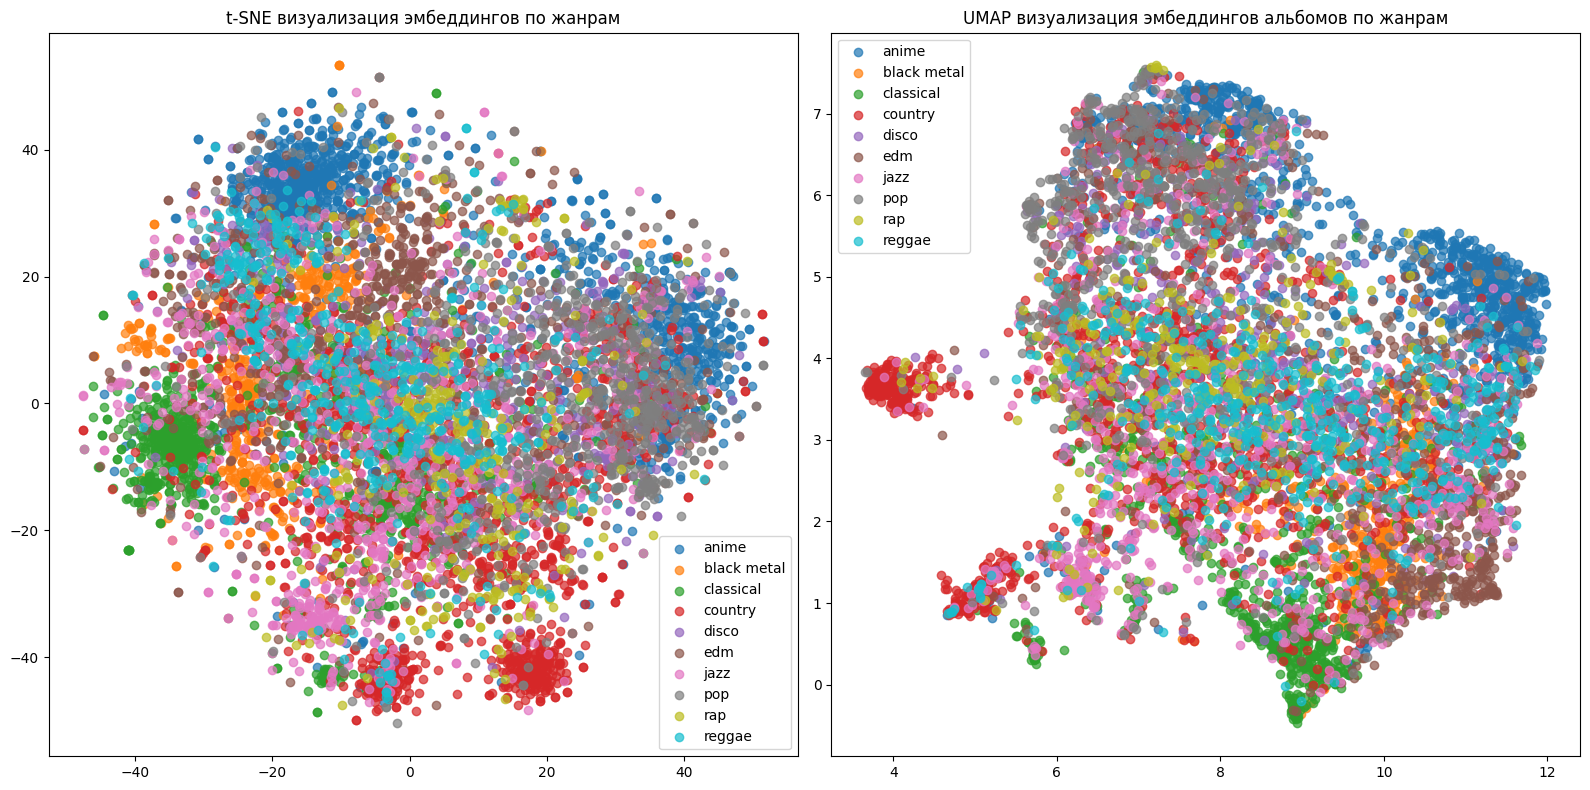

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
plot_embeddings(df_emb, [tsne_results, umap_res],
                ['t-SNE визуализация эмбеддингов по жанрам', 'UMAP визуализация эмбеддингов альбомов по жанрам'], axs)
plt.tight_layout()
plt.show()

1. Визуальный стиль обложек альбомов коррелирует с жанровой принадлежностью: кластеризация на графиках подтверждает наличие жанровой специфики в оформлении обложек.
2. Жанры с отличительным визуальным стилем формируют более плотные и изолированные кластеры: металл, классика и аниме демонстрируют эту тенденцию.
3. Жанры с высокой визуальной вариативностью образуют менее отчетливые кластеры с перекрытиями: это относится к поп, рэп и EDM.
4. Наличие "центральной" области с высокой плотностью точек: эта область может соответствовать жанрам с большей вариативностью визуального стиля или жанрам, находящимся на стыке нескольких стилей.
5. "Периферийные" кластеры с меньшей плотностью: жанры с более отличительным стилем часто располагаются на периферии графиков.
6. Сложность четкого разделения жанров исключительно по обложкам: перекрытия между кластерами указывают на ограничения данного подхода.

## Baseline model

Воспользуемся для базовой модели библиотекой faiss для поиска ближайших соседей.k-NN является простой и эффективной моделью для поиска ближайших соседей, что делает её подходящим выбором для baseline модели.

In [28]:
def initialize_faiss_index(X_train):
    """
    Инициализирует и наполняет индекс Faiss для быстрого поиска ближайших соседей.

    Параметры:
        X_train (np.array): Обучающий набор данных (признаки).

    Возвращает:
        faiss.IndexFlatL2: Индекс Faiss, заполненный обучающими векторами.
    """
    dim = X_train.shape[1]
    index = faiss.IndexFlatL2(dim)  # Создание индекса для поиска по L2
    index.add(X_train)  # Добавляем обучающие векторы в индекс
    return index

In [29]:
def get_predictions(index, X_val, y_train, k, weighted=False):
    """
    Получает предсказания для валидационного набора данных, используя индекс Faiss и голосование k ближайших соседей.

    Args:
        index (faiss.IndexFlatL2): Индекс Faiss, содержащий обучающие данные.
        X_val (np.array): Валидационный набор данных (признаки).
        y_train (pd.Series): Метки классов для обучающего набора.
        k (int): Количество ближайших соседей для поиска.
        weighted (bool): Использовать ли взвешенное голосование. По умолчанию False.

    Returns:
        np.array: Предсказанные метки классов для валидационного набора.
    """
    D, I = index.search(X_val, k)  # Поиск k ближайших соседей
    y_pred = np.array([y_train.iloc[ind].values for ind in I])

    if weighted:
        weights = 1 / (D + 1e-6)  # Избегаем деления на ноль
        weighted_votes = np.zeros(len(y_pred), dtype=int)

        for idx, weight in enumerate(weights):
            class_weights = np.zeros(len(np.unique(y_train)), dtype=np.float32)

            for class_idx, weight in zip(y_pred[idx], weights[idx]):
                class_weights[class_idx] += weight

            weighted_votes[idx] = class_weights.argmax()
        y_pred = weighted_votes
    else:
        # Голосование большинством
        y_pred = np.array([np.bincount(y_train.iloc[ind]).argmax() for ind in I])

    return y_pred

def calculate_f1_scores(index, X_val, y_train, y_val, k_range, weighted=False):

    results_micro = {}
    results_macro = {}

    for k in range(1, k_range + 1):
        y_pred = get_predictions(index, X_val, y_train, k, weighted)  # Получаем предсказания

        f1_micro = f1_score(y_val, y_pred, average='micro')
        f1_macro = f1_score(y_val, y_pred, average='macro')

        results_micro[k] = f1_micro
        results_macro[k] = f1_macro

    return results_micro, results_macro

In [30]:
def plot_f1_scores(results_micro, results_macro, results_micro_weighted, results_macro_weighted, k_range):
    plt.figure(figsize=(10, 6))
    plt.plot(list(results_micro.keys()), list(results_micro.values()), marker='o', label='F1 Micro',c='green')
    plt.plot(list(results_macro.keys()), list(results_macro.values()), marker='o', label='F1 Macro',c='blue')
    plt.plot(list(results_micro_weighted.keys()), list(results_micro_weighted.values()), marker='P', label='F1 Micro weighted',c='green')
    plt.plot(list(results_macro_weighted.keys()), list(results_macro_weighted.values()), marker='P', label='F1 Macro weighted',c='blue')

    # посчитаем среднее f1 между micro и macro
    average_f1_scores_unweighted = {k: (v_micro + v_macro) / 2 for k, v_micro, v_macro in zip(results_micro.keys(), results_micro.values(), results_macro.values())}
    average_f1_scores_weighted = {k: (v_micro_w + v_macro_w) / 2 for k, v_micro_w, v_macro_w in zip(results_micro_weighted.keys(), results_micro_weighted.values(), results_macro_weighted.values())}

    # Найдем лучшее соотношение среднего ф1
    best_k_unweighted = max(average_f1_scores_unweighted, key=average_f1_scores_unweighted.get)
    best_k_weighted = max(average_f1_scores_weighted, key=average_f1_scores_weighted.get)

    # найдем лучшие гиперпараметры
    if average_f1_scores_unweighted[best_k_unweighted] > average_f1_scores_weighted[best_k_weighted]:
        best_k = best_k_unweighted
        best_micro_f1 = results_micro[best_k]
        best_macro_f1 = results_macro[best_k]
        weighted = False
    else:
        best_k = best_k_weighted
        best_micro_f1 = results_micro_weighted[best_k]
        best_macro_f1 = results_macro_weighted[best_k]
        weighted = True

    print('BEST K:', best_k)
    print('best_micro_f1:', best_micro_f1)
    print('best_macro_f1:', best_macro_f1)
    print('WEIGHTED:', weighted)

    # отметим на графике лучшее k
    plt.plot(best_k, best_micro_f1, marker='*', color='red', markersize=12, label=f'Лучшее k={best_k}')
    plt.axvline(x=best_k, color='red', linestyle='--')

    plt.xticks(range(1, k_range + 1))
    plt.xlabel('Количество соседей')
    plt.ylabel('F1 Score')
    plt.title('Зависимость F1 Scores от количества соседей')
    plt.legend()
    plt.grid(True, axis='y')
    plt.show()

    return best_k, weighted

In [31]:
index = initialize_faiss_index(X_train)
# Использование функции
k_range = 20
results_micro, results_macro = calculate_f1_scores(index, X_val, y_train, y_val, k_range, weighted=False)

# Для взвешенного голосования
results_micro_weighted, results_macro_weighted = calculate_f1_scores(index, X_val, y_train, y_val, k_range, weighted=True)

In [32]:
key = lambda x: x[1]
max(results_micro_weighted.items(), key=key), max(results_macro_weighted.items(), key=key)

((9, 0.5148387096774194), (7, 0.4732299085790103))

BEST K: 7
best_micro_f1: 0.5141935483870967
best_macro_f1: 0.4732299085790103
WEIGHTED: True


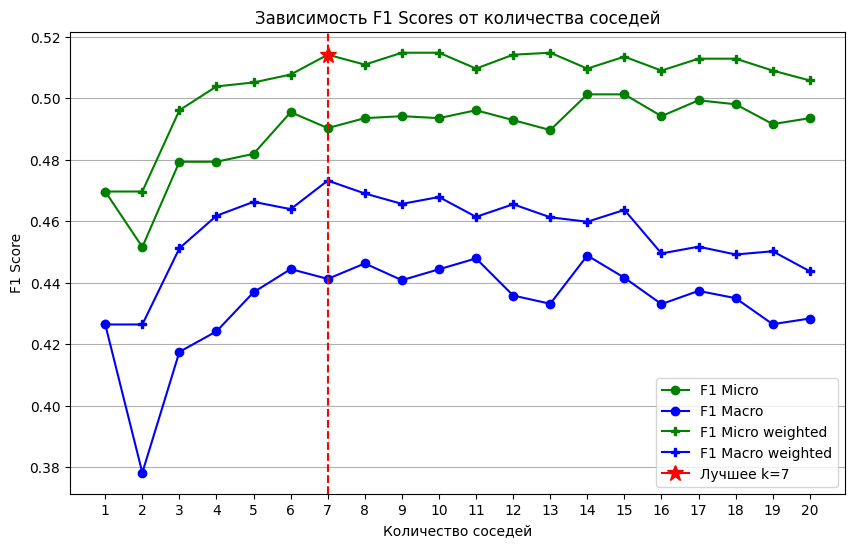

In [33]:
# выберем гиперпараметр количества соседей от лучшего соотношения среднего F1
best_k, WEIGHTED = plot_f1_scores(results_micro, results_macro, results_micro_weighted, results_macro_weighted, k_range)

Самый высокий F1 score micro weighted на 9 соседе, однако там просадка по F1 macro, поэтому выберем 7 соседа, что хорошо соотносится с правилом локтя.

Анализ кривой F1-score позволил выбрать оптимальное значение k, обеспечивающее наилучший баланс между точностью и полнотой.

## Расчет метрик

              precision    recall  f1-score   support

       anime       0.66      0.75      0.70       237
 black metal       0.76      0.63      0.69        90
   classical       0.50      0.79      0.61       190
     country       0.53      0.57      0.55       297
       disco       0.39      0.19      0.26        93
         edm       0.59      0.30      0.40       141
        jazz       0.40      0.36      0.38       164
         pop       0.37      0.34      0.36       158
         rap       0.53      0.31      0.39        65
      reggae       0.37      0.43      0.40       115

    accuracy                           0.51      1550
   macro avg       0.51      0.47      0.47      1550
weighted avg       0.51      0.51      0.50      1550



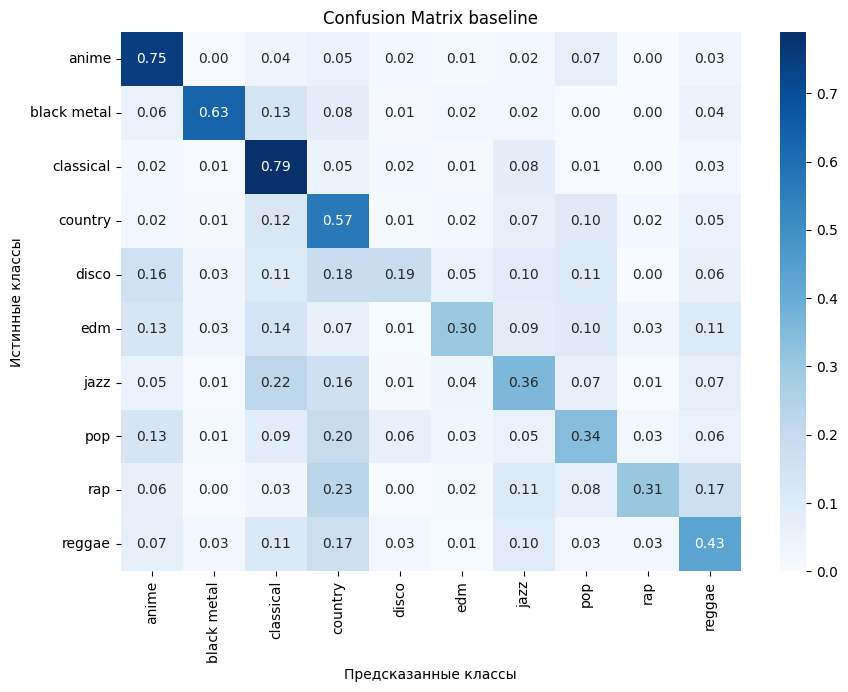

In [62]:
y_pred = get_predictions(index, X_val, y_train, best_k, weighted=WEIGHTED)
print(classification_report(y_val, y_pred, target_names=category_names))

# Построение матрицы ошибок
conf_matrix = confusion_matrix(y_val, y_pred, normalize='true')
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True,  cmap="Blues",fmt=".2f", xticklabels=category_names, yticklabels=category_names)
plt.title("Confusion Matrix baseline")
plt.ylabel('Истинные классы')
plt.xlabel('Предсказанные классы')
plt.show()

Из предоставленной матрицы ошибок и отчёта о классификации видно, что модель лучше всего работает с классами 'anime' и 'classical', имея наивысшую полноту (recall) и приемлемые показатели точности (precision). Это может быть связано с более чёткими или отличительными особенностями этих жанров, которые легче уловить модели.
  
Классы 'country' и 'jazz' показывают средние результаты, с балансом между точностью и полнотой, в то время как 'disco' и 'edm' имеют относительно низкие показатели по обоим метрикам, что указывает на более сложную задачу для модели в их распознавании.
  
Общая точность (accuracy) модели составляет 51%, что выше случайного угадывания, но всё же оставляет значительный простор для улучшения. Макросреднее значение (macro avg) для F1-скора на уровне 47% также указывает на некоторый дисбаланс в производительности между различными классами.

В нашем случае F1 микро хорошо соотносится с accuracy. Поэтому для отладки нейронной сети возьмем эту метрику.

Baseline модель достигла приемлемой точности, но оставляет значительный простор для улучшения.
  

## Подготовка данных для нейронной сети

Мы подготовим данные для дальнейшего обучения нейросети. Для этого нужно создать правильный загрузчик данных и загрузить набор данных, применив аугментации и необходимые преобразования к изображениям.

In [35]:
DATA_MODES = ['train', 'val', 'test']
df_nn = df_emb.iloc[:,-3:]
idx_train = y_train.index
idx_val = y_val.index
idx_test = y_test.index

In [36]:
class AlbumsDataset(Dataset):
    """
    Датасет с картинками, который паралельно подгружает их из папок
    производит скалирование и превращение в торчевые тензоры
    """
    def __init__(self, df, mode):
        super().__init__()
        # список файлов для загрузки
        self.files = list(df.file)
        # режим работы
        self.mode = mode

        if self.mode not in DATA_MODES:
            print(f"{self.mode} is not correct; correct modes: {DATA_MODES}")
            raise NameError

        self.len_ = len(self.files)

        if self.mode != 'test':
            self.label = df.label

    def __len__(self):
        return self.len_

    def load_sample(self, file):
        image = PIL.Image.open(file).convert('RGB')
        return image

    def __getitem__(self, idx):
        if self.mode in ['val','test']:
            transform = v2.Compose([        v2.PILToTensor(),
                                            v2.Resize((240, 240)),
                                            v2.ToDtype(torch.float32, scale=True),
                                            v2.Normalize(mean=[0.485, 0.456, 0.406],
                                                                 std=[0.229, 0.224, 0.225])
                                          ])
        else:
            transform = v2.Compose([          v2.PILToTensor(),
                                              v2.RandomChoice([v2.AutoAugment(v2.AutoAugmentPolicy.IMAGENET),
                                                               v2.AutoAugment(v2.AutoAugmentPolicy.CIFAR10),
                                                               v2.AutoAugment(v2.AutoAugmentPolicy.SVHN)]),
                                              v2.Resize((240, 240)),
                                              v2.ToDtype(torch.float32, scale=True),
                                              v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                          ])

        file = self.files[idx]
        x = self.load_sample(file)
        x = transform(x)

        if self.mode == 'test':
            return x
        else:
            # genre = self.genre[idx]
            label = self.label[idx]
            return x, label

In [37]:
def imshow(inp, title=None, plt_ax=plt, default=False):
    """Imshow для тензоров"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

In [38]:
train_dataset = AlbumsDataset(df_nn.loc[idx_train].reset_index(drop=True),mode='train')
val_dataset = AlbumsDataset(df_nn.loc[idx_val].reset_index(drop=True),mode='val')

Подготовили данные для обучения нейронной сети.

## Обучение нейронной сети

### Функции

Сначала напишем функции для обучения и предсказний модели.

In [39]:
def train_one_epoch(model, data_loader, criterion, optimizer, device):
    model.train()  # Переводим модель в режим обучения
    running_loss = 0.0
    correct = 0
    total = 0

    # Создаем прогресс-бар, который автоматически закроется по окончании эпохи
    with tqdm(data_loader, unit="batch") as tepoch:
        for inputs, labels in tepoch:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()  # Обнуляем градиенты
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()  # Вычисляем градиенты
            optimizer.step()  # Обновляем веса

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Обновляем прогресс-бар с текущей информацией о потерях
            tepoch.set_postfix(loss=loss.item(), accuracy=100. * correct / total)

    accuracy = 100 * correct / total
    return running_loss / len(data_loader), accuracy

In [40]:
def evaluate_model(model, data_loader, criterion, device):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return val_loss / len(data_loader), accuracy

In [41]:
def train_model(model, train_ds, val_ds, num_epochs, criterion, optimizer, device, batch_size):
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True) #sampler=train_sampler,
    val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False)

    best_model_wts = model.state_dict()
    best_acc = 0.0
    history = []

    optimizer = optimizer

    for epoch in range(num_epochs):
        start_time = time.time()

        train_loss, train_accuracy = train_one_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_accuracy = evaluate_model(model, val_loader, criterion, device)

        epoch_duration = time.time() - start_time  # Вычисление времени выполнения эпохи
        total_duration = time.time() - start_time  # Общее время обучения с начала первой эпохи

        print(f'Epoch {epoch + 1}/{num_epochs} - Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')
        print(f'Epoch duration: {epoch_duration:.2f}s, Total training time: {total_duration:.2f}s')

        if val_accuracy > best_acc:
            best_acc = val_accuracy
            best_model_wts = model.state_dict().copy()
        history.append((train_loss, train_accuracy, val_loss, val_accuracy, epoch_duration))

    return history, best_model_wts

In [42]:
def predict_one_sample(model, inputs, device=device):
    """Предсказание, для одной картинки"""
    with torch.no_grad():
        inputs = inputs.to(device)
        model.eval()
        logit = model(inputs).cpu()
        probs = torch.nn.functional.softmax(logit, dim=-1).numpy()
    return probs

In [43]:
def predict(model, test_loader, y_test=None):
    with torch.no_grad():
        logits = []
        loss = []
        criterion = nn.CrossEntropyLoss(reduction='none')
        for idx, inputs in enumerate(test_loader):
            inputs = inputs.to(device)
            model.eval()
            outputs = model(inputs).cpu()
            if y_test is not None:
                start_idx = idx * len(inputs)
                end_idx = (idx + 1) * len(inputs)
                y = torch.LongTensor(y_test.values[start_idx:end_idx])
                loss.extend(criterion(outputs, y).numpy().tolist())

            logits.append(outputs)

    probs = nn.functional.softmax(torch.cat(logits), dim=-1).numpy()
    return probs, loss

### Модель

EfficientNet B1 представляет собой эффективную архитектуру нейронной сети, которая достигает высокого качества при относительно небольшом количестве параметров. Предобученные веса IMAGENET1K_V2 предоставляют модели хорошую начальную точку для обучения на задаче классификации жанров.

Были рассмотрены и другие модели, такие как efficientnet_b0, efficientnet_b2, efficientnet_b3 и ViT, но по соотношению скорости и качества efficientnet_b1 был признан лучшим вариантом.

In [44]:
model = models.efficientnet_b1(weights='EfficientNet_B1_Weights.IMAGENET1K_V2')
n_classes = len(category_names)

Downloading: "https://download.pytorch.org/models/efficientnet_b1-c27df63c.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b1-c27df63c.pth
100%|██████████| 30.1M/30.1M [00:00<00:00, 139MB/s]


In [45]:
num_ftrs = model.classifier[1].in_features

model.classifier = nn.Sequential(
    nn.Dropout(p=0.3, inplace=True),
    nn.Linear(num_ftrs, 512),
    nn.BatchNorm1d(512),
    nn.ReLU(),
    nn.Dropout(p=0.3),
    nn.Linear(512, n_classes)
)

Кастомный классификатор улучшает результаты классификации за счет лучшего адаптирования модели к специфике задачи, позволяя достичь более высоких значений метрик.

In [46]:
model= model.to(device)
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.AdamW([
    {'params': model.parameters(), 'lr': 3e-4, 'weight_decay': 5e-3},
    # {'params': model.features.parameters(), 'lr': 0.5e-4,'weight_decay': 1e-4},
    # {'params': model.classifier.parameters(), 'lr': 1e-4,'weight_decay': 1e-4}
])

BATCH_SIZE = 64
EPOCHS = 10

Эксперименты, проведенные без weight_decay и с различными вариантами learning rate для отдельных частей нейронной сети, показали следующее: отсутствие weight_decay приводило к быстрому переобучению, а раздельная настройка learning rate и weight_decay для разных частей сети не дала ощутимых результатов.

In [ ]:
history, best_model = train_model(model, train_dataset, val_dataset, EPOCHS, criterion, optimizer, device, BATCH_SIZE)

  0%|          | 0/73 [00:00<?, ?batch/s]

Epoch 1/10 - Train Loss: 1.6716, Train Accuracy: 42.21%, Val Loss: 1.1995, Val Accuracy: 59.03%
Epoch duration: 111.29s, Total training time: 111.29s


  0%|          | 0/73 [00:00<?, ?batch/s]

Epoch 2/10 - Train Loss: 1.1595, Train Accuracy: 61.40%, Val Loss: 1.0294, Val Accuracy: 64.00%
Epoch duration: 94.13s, Total training time: 94.13s


  0%|          | 0/73 [00:00<?, ?batch/s]

Epoch 3/10 - Train Loss: 0.9598, Train Accuracy: 67.58%, Val Loss: 0.9488, Val Accuracy: 67.23%
Epoch duration: 95.35s, Total training time: 95.35s


  0%|          | 0/73 [00:00<?, ?batch/s]

Epoch 4/10 - Train Loss: 0.7807, Train Accuracy: 74.83%, Val Loss: 0.9203, Val Accuracy: 68.26%
Epoch duration: 99.83s, Total training time: 99.83s


  0%|          | 0/73 [00:00<?, ?batch/s]

Epoch 5/10 - Train Loss: 0.6313, Train Accuracy: 79.41%, Val Loss: 0.8875, Val Accuracy: 69.68%
Epoch duration: 94.15s, Total training time: 94.15s


  0%|          | 0/73 [00:00<?, ?batch/s]

Epoch 6/10 - Train Loss: 0.5309, Train Accuracy: 83.24%, Val Loss: 0.8938, Val Accuracy: 69.55%
Epoch duration: 92.04s, Total training time: 92.04s


  0%|          | 0/73 [00:00<?, ?batch/s]

Epoch 7/10 - Train Loss: 0.4670, Train Accuracy: 84.55%, Val Loss: 0.9057, Val Accuracy: 69.42%
Epoch duration: 93.10s, Total training time: 93.10s


  0%|          | 0/73 [00:00<?, ?batch/s]

Epoch 8/10 - Train Loss: 0.3910, Train Accuracy: 87.48%, Val Loss: 0.9408, Val Accuracy: 69.61%
Epoch duration: 93.35s, Total training time: 93.35s


  0%|          | 0/73 [00:00<?, ?batch/s]

Epoch 9/10 - Train Loss: 0.3121, Train Accuracy: 90.36%, Val Loss: 0.9773, Val Accuracy: 69.87%
Epoch duration: 92.77s, Total training time: 92.77s


  0%|          | 0/73 [00:00<?, ?batch/s]

Epoch 10/10 - Train Loss: 0.2881, Train Accuracy: 90.96%, Val Loss: 0.9590, Val Accuracy: 71.35%
Epoch duration: 105.99s, Total training time: 105.99s


In [ ]:
epochs = range(1, EPOCHS+ 1)
train_losses, train_accuracies, val_losses, val_accuracies, _ = zip(*history)

max_accuracy_epoch, max_accuracy = max(enumerate(val_accuracies, start=1), key=lambda x: x[1])

print(f"ЭПОХА: {max_accuracy_epoch}, МАКСИМАЛЬНАЯ ТОЧНОСТЬ ПО ВАЛИДАЦИИ: {max_accuracy}%")

ЭПОХА: 10, МАКСИМАЛЬНАЯ ТОЧНОСТЬ ПО ВАЛИДАЦИИ: 71.35483870967742%


In [ ]:
# del model
# del best_model
# import gc
# torch.cuda.empty_cache()
# gc.collect()

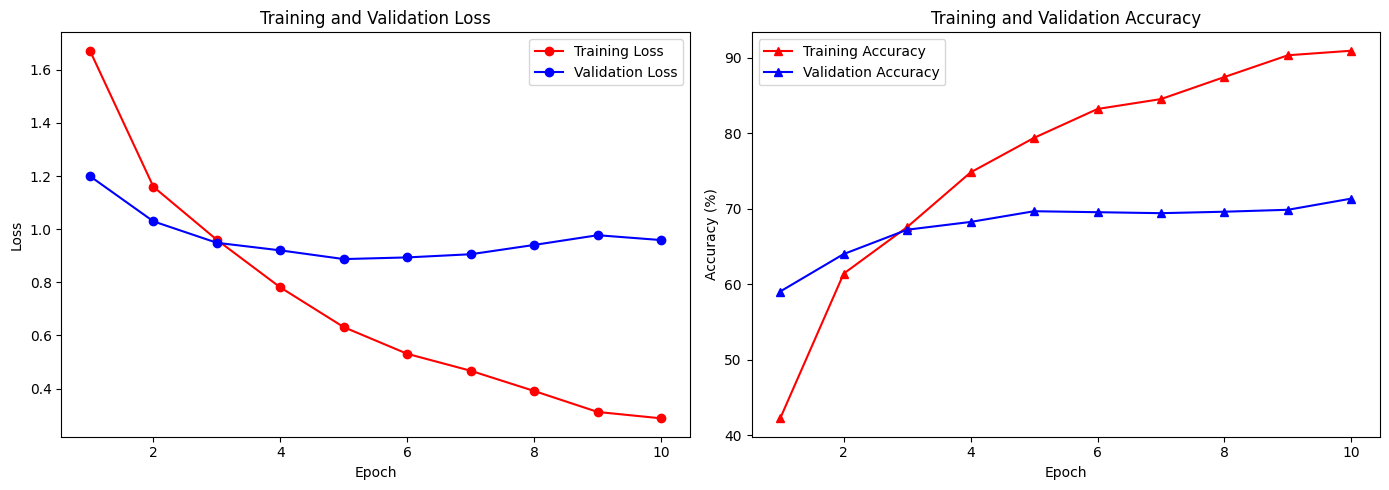

In [ ]:
# Создаем графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# График лоссов
ax1.plot(epochs, train_losses, 'ro-', label='Training Loss')
ax1.plot(epochs, val_losses, 'bo-', label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# График точности
ax2.plot(epochs, train_accuracies, 'r^-', label='Training Accuracy')
ax2.plot(epochs, val_accuracies, 'b^-', label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()

plt.tight_layout()
plt.show()

 Модель была обучена с использованием стандартных техник оптимизации и регуляризации. Анализ графиков потерь и точности позволяет оценить процесс обучения и убедиться в отсутствии переобучения.

In [47]:
# Подгрузим веса
file_path = '/content/model_weights_b1.pth'

# Проверка наличия файла
if not os.path.exists(file_path):
    # URL для скачивания файла
    url = "https://drive.google.com/file/d/1JadjwJCGpfuuYnjsriVlHnEfFgOJmQhf/view?usp=drive_link"

    # Загрузка файла
    gdown.download(url=url, output=file_path, quiet=False, fuzzy=True)
    model.load_state_dict(torch.load('/content/model_weights_b1.pth'))

else:
    print(f"Файл {file_path} уже существует.")
    model.load_state_dict(torch.load('/content/model_weights_b1.pth'))

Downloading...
From (original): https://drive.google.com/uc?id=1JadjwJCGpfuuYnjsriVlHnEfFgOJmQhf
From (redirected): https://drive.google.com/uc?id=1JadjwJCGpfuuYnjsriVlHnEfFgOJmQhf&confirm=t&uuid=f8152143-f07e-44d9-8b34-ad378f961152
To: /content/model_weights_b1.pth
100%|██████████| 29.1M/29.1M [00:00<00:00, 32.5MB/s]


Модель достигла  максимальной точности на валидационной выборки в 70.6 % на 6 Эпохе.

## Расчет и сравнение метрик

In [48]:
test_dataset = AlbumsDataset(df_nn.loc[idx_test].reset_index(drop=True), mode='test')
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

probs_ims, loss_test = predict(model, test_loader, y_test=y_test)
y_pred_test = np.argmax(probs_ims,-1)

In [49]:
f1_micro = f1_score(y_test, y_pred_test, average='micro')
f1_macro = f1_score(y_test, y_pred_test, average='macro')

print(f'F1 MICRO TEST: {f1_micro}')
print(f'F1 MACRO TEST: {f1_macro}')

F1 MICRO TEST: 0.7103225806451614
F1 MACRO TEST: 0.6912907779249917


BASELINE F1 MICRO `0.514 < 0.710` EFF NET F1 MICRO  
BASELINE F1 MACRO `0.473 < 0.691` EFF NET F1 MACRO


              precision    recall  f1-score   support

       anime       0.81      0.87      0.84       237
 black metal       0.86      0.86      0.86        90
   classical       0.84      0.93      0.88       190
     country       0.72      0.72      0.72       297
       disco       0.62      0.45      0.52        93
         edm       0.62      0.63      0.62       140
        jazz       0.62      0.54      0.58       164
         pop       0.54      0.54      0.54       158
         rap       0.67      0.74      0.70        65
      reggae       0.65      0.65      0.65       116

    accuracy                           0.71      1550
   macro avg       0.69      0.69      0.69      1550
weighted avg       0.71      0.71      0.71      1550



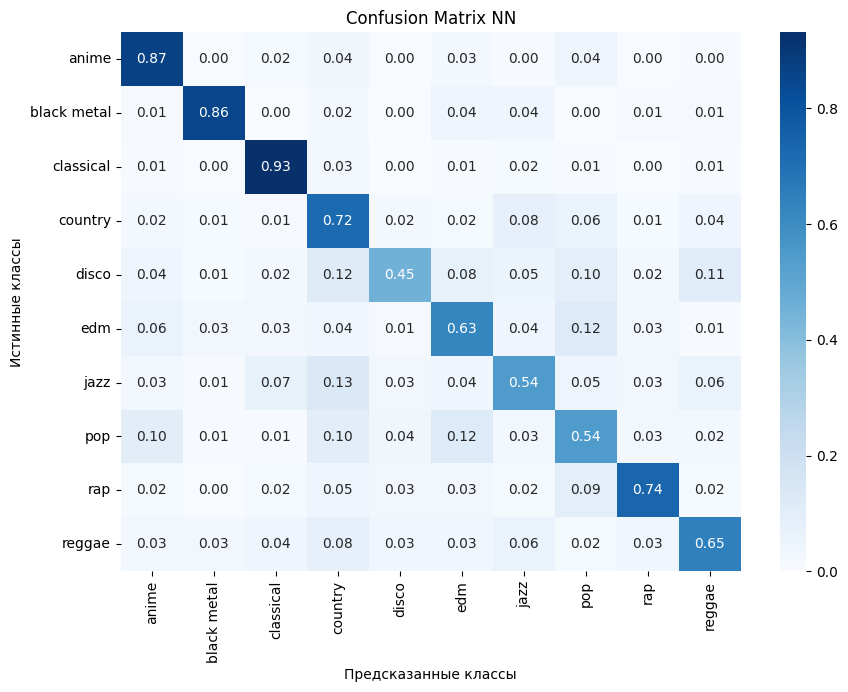

In [61]:
print(classification_report(y_test, y_pred_test, target_names=category_names))

conf_matrix_nn = confusion_matrix(y_test, y_pred_test, normalize='true')
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_nn, annot=True,  cmap="Blues",fmt=".2f", xticklabels=category_names, yticklabels=category_names)
plt.title("Confusion Matrix NN")
plt.ylabel('Истинные классы')
plt.xlabel('Предсказанные классы')
plt.show()

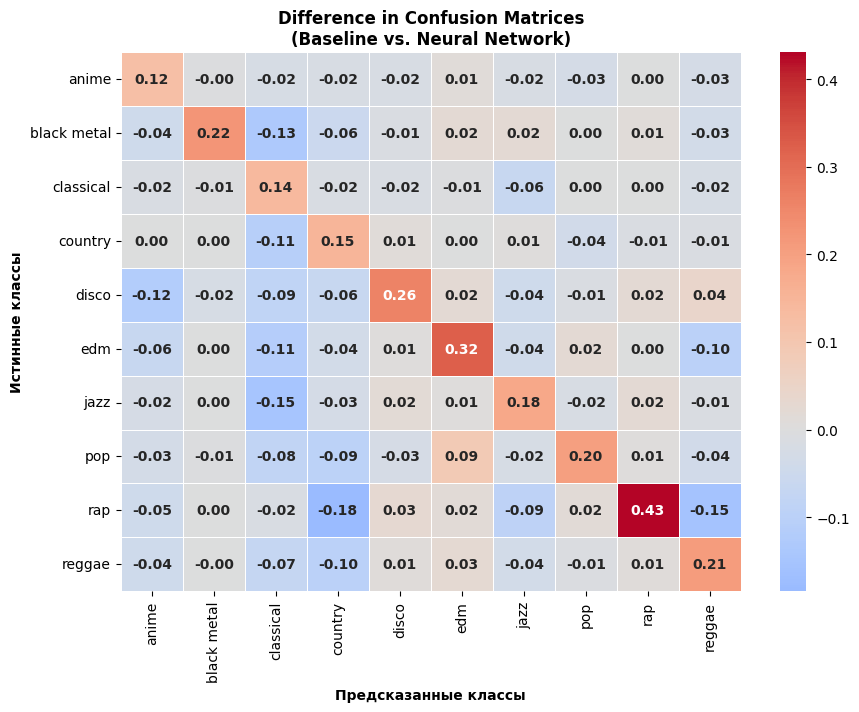

In [58]:
# Разница между матрицами бейзлайна и нейронной сети
diff_matrix = conf_matrix_nn - conf_matrix

# Создаем рамку и тень
plt.figure(figsize=(10, 7), facecolor='white', edgecolor='black')
# plt.grid(True)

# Улучшенные аннотации и палитра цветов
sns.heatmap(diff_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f",
            annot_kws={"size": 10, "weight": "bold"}, linewidths=.5, linecolor='white',
            xticklabels=category_names, yticklabels=category_names)

# Улучшенный заголовок и подписи осей
plt.title("Difference in Confusion Matrices\n(Baseline vs. Neural Network)", fontweight='bold')
plt.ylabel('Истинные классы', fontweight='bold')
plt.xlabel('Предсказанные классы',fontweight='bold')
plt.show()

Efficient Net B2 с предобученными весами, значительно улучшило качество классификации музыкальных жанров по сравнению с базовой моделью FAISS. Нейронная сеть продемонстрировала более высокие показатели по всем основным метрикам для всех классов.
  


## Анализ финальной модели

Посмотрим на ошибки предсказаний, где ошибается модель.

In [52]:
idx_error =  (y_test != y_pred_test)
df_error = df_nn.loc[idx_test][idx_error]
df_error['pred_label'] = y_pred_test[idx_error]
df_error['pred_genre'] = df_error['pred_label'].map(lambda x: category_names[x])
df_error['loss'] = np.array(loss_test)[idx_error]

In [53]:
%%time
fig, axs = plt.subplots(nrows=len(category_names), ncols=8, figsize=(16, len(category_names) * 2.5))

# Убираем оси, так как они не нужны для изображений
for ax in axs.flat:
    ax.axis('off')

# Группируем ошибочные данные по реальным жанрам
for idx, (genre, group) in enumerate(df_error.groupby('genre')):
    # Сортируем по возрастанию потерь и берем 8 изображений равномерно
    sorted_errors = group.sort_values(by='loss')
    if len(sorted_errors) > 8:
        selected_indices = np.linspace(0, len(sorted_errors) - 1, 8).astype(int)
        selected_errors = sorted_errors.iloc[selected_indices]
    else:
        selected_errors = sorted_errors.head(8)

    for col, image_data in enumerate(selected_errors.itertuples()):
        img = PIL.Image.open(image_data.file)
        axs[idx, col].imshow(img)
        real_genre = image_data.genre
        pred_genre = image_data.pred_genre
        loss_value = image_data.loss
        axs[idx, col].set_title(
            f'Real: {real_genre}\nPred: {pred_genre}\nLoss: {loss_value:.2f}', fontsize=12)

# Отображаем изображения
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

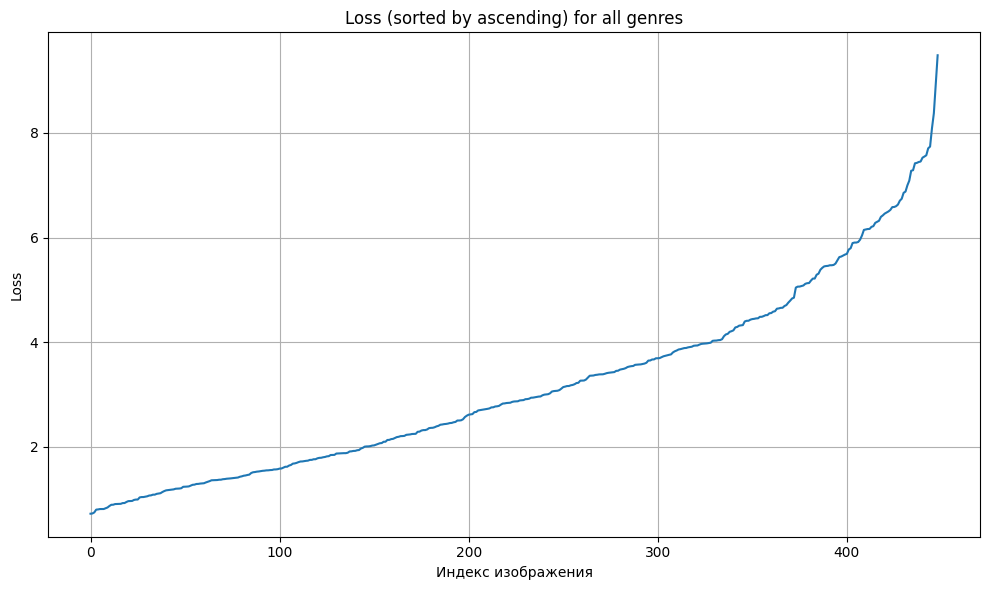

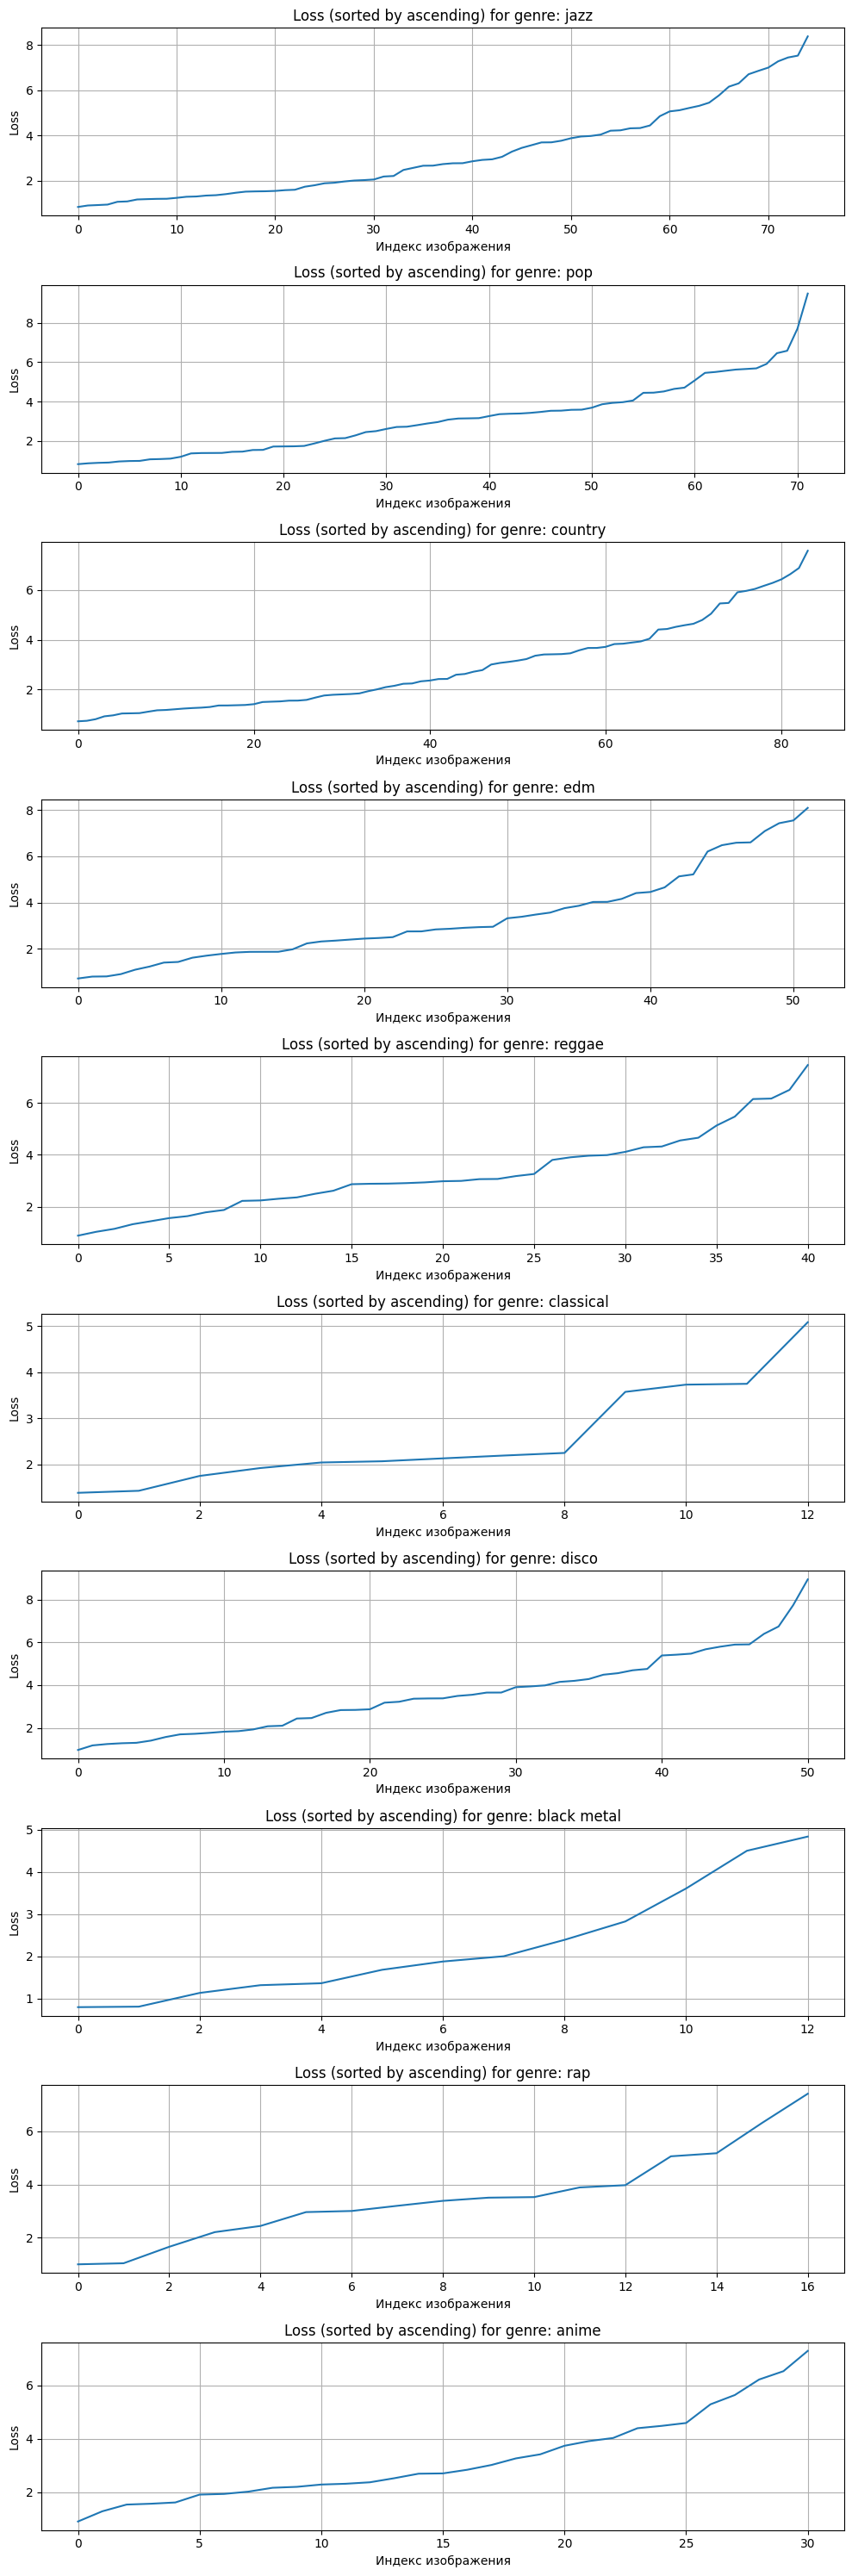

In [54]:
df_error_sorted = df_error.sort_values(by='loss')

# Общий график для всех жанров
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_error_sorted, x=range(len(df_error_sorted)), y='loss')
plt.xlabel('Индекс изображения')
plt.ylabel('Loss')
plt.title('Loss (sorted by ascending) for all genres')
plt.grid(True)
plt.tight_layout()
plt.show()

# График для каждого жанра отдельно
genres = df_error['genre'].unique()
fig, axs = plt.subplots(nrows=len(genres), ncols=1, figsize=(10, len(genres) * 3))

for idx, genre in enumerate(genres):
    genre_data = df_error[df_error['genre'] == genre].sort_values(by='loss')
    sns.lineplot(data=genre_data, x=range(len(genre_data)), y='loss', ax=axs[idx])
    axs[idx].set_title(f'Loss (sorted by ascending) for genre: {genre}')
    axs[idx].set_xlabel('Индекс изображения')
    axs[idx].set_ylabel('Loss')
    axs[idx].grid(True)

plt.tight_layout()
plt.show()

**ВЫВОД**
* Все графики демонстрируют равномерное увеличение потерь от минимальных до максимальных значений, что показывает разумное распределение ошибок в пределах жанров.
* Значительный вклад в общие ошибки вносят обложки, которые либо действительно могут быть другим жанром (Usher — real:pop pred:rap), либо их обложка стилизована под другой жанр.
* Некоторые обложки достаточно сложны для корректной классификации даже для человека. Это может быть связано с использованием абстрактных или нетипичных визуальных элементов, которые не позволяют однозначно отнести обложку к определенному жанру.
* Путаница между жанрами "диско" и "регги", а также "диско" и "кантри" может быть обусловлена визуальными сходствами в оформлении обложек этих жанров. Например, использование ярких цветов, определенных шрифтов или стилистических элементов.
* Жанры с широким спектром поджанров и вариаций, такие как "поп",  могут вызывать трудности у модели при классификации. Разнообразие визуальных стилей и культурных влияний внутри одного жанра усложняет задачу выделения четких признаков для корректной классификации.
* Анализируя матрицу ошибок, можно заметить, что некоторые жанры, такие как "рэп", "джаз" и "эдм", часто путаются с другими жанрами. Это может быть связано с тем, что обложки этих жанров имеют схожие визуальные элементы или стили с обложками других жанров.
* Классы с меньшим количеством примеров в обучающей выборке, такие как "диско" и "рэп", могут быть более склонны к ошибкам классификации из-за недостаточного количества данных для обучения модели.

**Рекомендации для улучшения:**
* Увеличить набор данных для жанров с высоким уровнем ошибок, таких как диско, рэп и эдм, добавив больше образцов обложек для выявления уникальных визуальных характеристик.
* Включить метаинформацию, такую как год выпуска и страну, чтобы отразить социокультурные аспекты в дизайне обложек.
* Взять модель большего размера
* Использовать мультимодальные подходы, интегрируя визуальные и текстовые данные для улучшения классификации.
* Применить OCR для получения текстовой информации с обложек, что может усилить точность классификации при совместном анализе с визуальными признаками.

## Embedding Representation v2


In [55]:
# Подгрузим эмбединги после сохранения
file_path = '/content/embeddings_new.pkl'

# Проверка наличия файла
if not os.path.exists(file_path):
    # URL для скачивания файла
    url = "https://drive.google.com/file/d/1uboZv4urCJT4SRN_qAk_3iCs5ZyVHSF1/view?usp=drive_link"

    # Загрузка файла
    gdown.download(url=url, output=file_path, quiet=False, fuzzy=True)

    df_emb_2 = pd.read_pickle('/content/embeddings_new.pkl')

else:
    print(f"Файл {file_path} уже существует.")
    try:
        df_emb_2 = pd.read_pickle(file_path)
    except FileNotFoundError:
        print("Файл не найден.")

        model_emb = torch.nn.Sequential(*(list(model.children())[:-1]))
        model_emb = model_emb.to(device)  # Перенос модели на GPU
        model_emb.eval()

        full_dataset = AlbumsDataset(df_nn.reset_index(drop=True),mode='val')
        full_loader = DataLoader(full_dataset, batch_size=BATCH_SIZE, shuffle=False)

        embeddings = []

        with torch.no_grad():
            for num, (images, targets) in enumerate(tqdm(full_loader)):
                images = images.to(device)
                outputs = model_emb(images).to('cpu')
                embeddings.append(outputs.squeeze(-1).squeeze(-1))

        embeddings = torch.cat(embeddings, dim=0)

        # Преобразование эмбеддингов в DataFrame
        df_emb_2 = pd.DataFrame(embeddings.numpy())
        df_emb_2['file'] = df_nn['file']
        df_emb_2['genre'] = df_nn['genre']
        df_emb_2.to_pickle('embeddings_new.pkl')

Downloading...
From: https://drive.google.com/uc?id=1uboZv4urCJT4SRN_qAk_3iCs5ZyVHSF1
To: /content/embeddings_new.pkl
100%|██████████| 41.3M/41.3M [00:03<00:00, 10.5MB/s]


In [63]:
emb_v2 = df_emb_2.iloc[:,:1280]

tsne_results_2 = TSNE(n_components=2, random_state=SEED, n_jobs=-1).fit_transform(emb_v2.values)
reducer_2 = umap.UMAP(n_jobs=-1)

umap_res_2 = reducer_2.fit_transform(emb_v2.values)

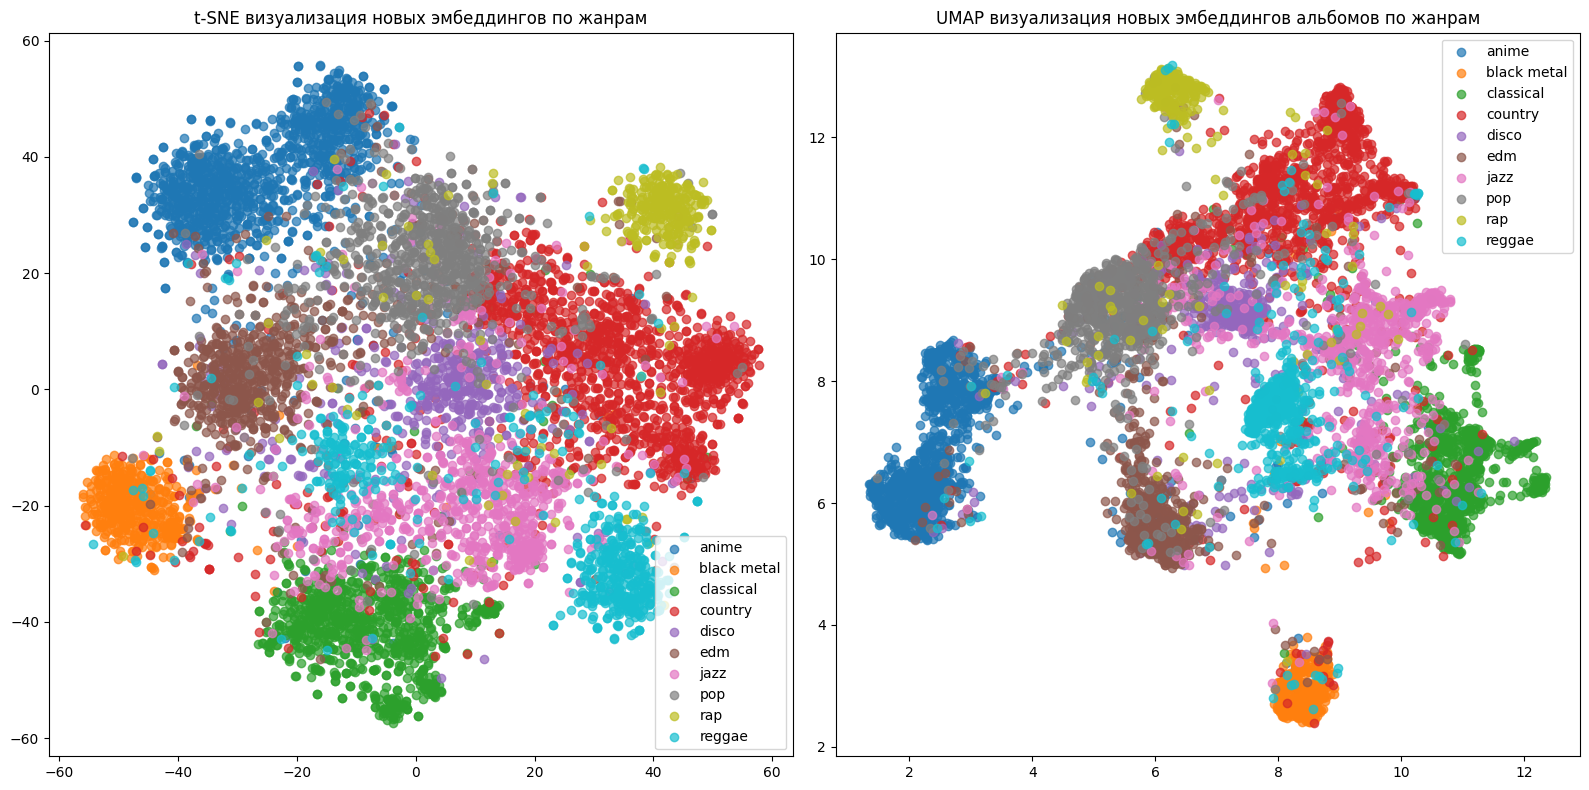

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

plot_embeddings(df_emb_2, [tsne_results_2, umap_res_2],
                ['t-SNE визуализация новых эмбеддингов по жанрам', 'UMAP визуализация новых эмбеддингов альбомов по жанрам'], axs)
plt.tight_layout()
plt.show()

* На основе визуализации видно, что эмбеддинги, извлеченные из обученной нейронной сети, показывают довольно хорошую кластеризацию по жанрам. Это свидетельствует о том, что сеть смогла выявить значимые характеристики, характерные для разных музыкальных жанров.
* Большинство жанров формируют отдельные, хорошо различимые кластеры, что говорит о высокой степени различимости между ними. Это указывает на потенциал нейронной сети для задач классификации.
* Однако встречаются некоторые перекрытия между кластерами, особенно в случаях, когда визуальные стили жанров могут пересекаться. Это может указывать на общие визуальные мотивы или на музыкальные кросс-жанры.
* Кластеры для некоторых жанров (например, 'anime' и 'jazz') могут быть более компактными и изолированными, что указывает на уникальные и характерные для этих жанров образцы на обложках альбомов.
* В то же время более разреженные и разнообразные кластеры могут отражать внутреннее разнообразие жанра или меньшую степень согласованности в визуальном представлении альбомов.